In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

In [ ]:
# Ruta al archivo Excel
excel_file = 'Resultados admisión UNI 2024-2.xlsx'

# Leer todas las hojas en un diccionario de DataFrames
df_dict = pd.read_excel(excel_file, sheet_name=None)

# Acceder a cada DataFrame individualmente
admision = df_dict['examen admision']
vocacional = df_dict['admision vocacional']
cepreuni = df_dict['cepreuni']
cepre_juliaca = df_dict['CEPREUNI Juliaca']

In [ ]:
admision = admision[~admision.isin(['****']).any(axis=1)]

In [ ]:
admision = admision.replace('AUSENTE', 0)

<ipython-input-54-9aba4b6d539c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  admision = admision.replace('AUSENTE', 0)


In [ ]:
admision['Código'] = admision['Código'].astype(str)
admision['Nombres'] = admision['Nombres'].astype(str)
admision['Modalidad'] = admision['Modalidad'].astype(str)
admision['Observación'] = admision['Observación'].astype(str)
admision['Resultado'] = admision['Resultado'].astype(str)
admision['Nota'] = admision['Nota'].astype(float)
admision['Prueba 1'] = admision['Prueba 1'].astype(float)
admision['Prueba 2'] = admision['Prueba 2'].astype(float)
admision['Prueba 3'] = admision['Prueba 3'].astype(float)
admision['Acumulado'] = admision['Acumulado'].astype(float)

In [ ]:
admision['Carrera'] = admision['Resultado'].str.extract(r'Ingreso a:\s*(.*)')[0]

In [ ]:
facultades = {
'FAUA' : ['ARQUITECTURA'],
'FIC' : ['INGENIERÍA CIVIL'],
'FIEECS' : ['INGENIERÍA ECONÓMICA', 'INGENIERÍA ESTADÍSTICA'],
'FIGMM' : ['INGENIERÍA GEOLOGICA','INGENIERÍA METALÚRGICA','INGENIERÍA DE MINAS'],
'FIIS' : ['INGENIERÍA INDUSTRIAL','INGENIERÍA DE SISTEMAS','INGENIERÍA DE SOFTWARE'],
'FIEE' : ['INGENIERÍA ELÉCTRICA','INGENIERÍA ELECTRÓNICA','INGENIERÍA DE TELECOMUNICACIONES','INGENIERÍA DE CIBERSEGURIDAD'],
'FIM' : ['INGENIERÍA MECÁNICA','INGENIERÍA MECÁNICA ELÉCTRICA','INGENIERÍA NAVAL','INGENIERÍA MECATRÓNICA'],
'FC' : ['FÍSICA','MATEMÁTICAS','QUÍMICA','INGENIERÍA FÍSICA','CIENCIA DE LA COMPUTACIÓN'],
'FIP' : ['INGENIERÍA PETROQUÍMICA','INGENIERÍA DE PETRÓLEO Y GAS NATURAL'],
'FIQT' : ['INGENIERÍA QUÍMICA','INGENIERÍA TEXTIL'],
'FIA' : ['INGENIERÍA SANITARIA','INGENIERÍA DE HIGIENE Y SEGURIDAD INDUSTRIAL','INGENIERÍA AMBIENTAL']
}

admision['Facultad'] = admision['Carrera'].apply(lambda c: next((f for f, cs in facultades.items() if c in cs), np.nan))

In [ ]:
admision_arqui = admision[admision['NV'].notna()]

In [ ]:
admision_arqui

,Código,Nombres,Modalidad,Prueba 1,Prueba 2,Prueba 3,Acumulado,Nota,NV,NA,Resultado,Observación,Carrera,Facultad
171,10826I,LAIME VENGOLEA CHRIS FIORELLA,ORDINARIO,439.56,258.0,255.0,952.56,10.325,13.96,11.415,No obtuvo vacante,nan,NaN,NaN
1634,34568C,POZO TAYPE HEIDY BRIGITTE,ORDINARIO,318.48,192.0,70.0,580.48,6.292,7.88,6.768,No obtuvo vacante,nan,NaN,NaN
2406,35368J,VEGA VALENCIA CAMILA ALEXA,ORDINARIO,325.32,135.0,17.5,477.82,5.179,12.76,7.453,No obtuvo vacante,nan,NaN,NaN
2711,42437B,BRAVO TABOADA SAMY WILMER,ORDINARIO,315.60,243.0,187.5,746.10,8.087,5.00,7.160,No obtuvo vacante,nan,NaN,NaN
2793,42527A,VERA BENDEZÚ JOSELYN YANELY,ORDINARIO,408.40,312.0,235.0,955.40,10.356,15.16,11.797,No obtuvo vacante,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933,51481B,RAMOS YARLEQUE MARK YARÉ,EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS,441.88,402.0,335.0,1178.88,12.779,14.36,13.253,Ingreso a: ARQUITECTURA,nan,ARQUITECTURA,FAUA
4935,51656J,CHIROQUE YOVERA JOSÉ ALESSANDRO,EXTRAORDINARIO 1 - DOS PRIMEROS ALUMNOS,536.24,354.0,342.5,1232.74,13.363,16.00,14.154,Ingreso a: ARQUITECTURA,nan,ARQUITECTURA,FAUA
4942,51236A,LAPA ÑAHUI LUIS MARIO,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,327.60,204.0,92.5,624.10,6.765,11.56,8.203,No obtuvo vacante,nan,NaN,NaN
4943,51510E,CHARRI MALLQUI MICIEL ANGHELA,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,420.84,117.0,105.0,642.84,6.968,7.56,7.145,No obtuvo vacante,nan,NaN,NaN


In [ ]:
admision_sin_arqui = admision[admision['NV'].isna()]

In [ ]:
admision_sin_arqui['Ingreso'] = np.where(admision_sin_arqui['Carrera'].notna(), 'Si', 'No')

<ipython-input-61-1361b7b1cfc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admision_sin_arqui['Ingreso'] = np.where(admision_sin_arqui['Carrera'].notna(), 'Si', 'No')


In [ ]:
admision_sin_arqui = admision_sin_arqui.drop(columns=['NV', 'NA', 'Observación','Resultado'])

In [ ]:
admision_sin_arqui

,Código,Nombres,Modalidad,Prueba 1,Prueba 2,Prueba 3,Acumulado,Nota,Carrera,Facultad,Ingreso
0,10622E,LOPEZ ROSAS MIJAEL KEMET,ORDINARIO,295.56,60.0,110.0,465.56,5.046,NaN,NaN,No
1,10625I,YAURI RAMOS JHONNY FRASER,ORDINARIO,305.40,132.0,90.0,527.40,5.717,NaN,NaN,No
2,10626C,METZGER GARCIA DANIEL EDUARDO,ORDINARIO,245.44,90.0,87.5,422.94,4.584,NaN,NaN,No
3,10627H,POLO ESCOBAR ROSA BERENICE,ORDINARIO,270.48,141.0,210.0,621.48,6.736,NaN,NaN,No
4,10628B,HERNÁNDEZ PÉREZ JESÚS ALBERTO,ORDINARIO,281.24,168.0,107.5,556.74,6.035,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
4938,21972D,ANDAMAYO ECHAVARRIA JHORVIN ALDAIR,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,342.72,264.0,210.0,816.72,8.853,NaN,NaN,No
4939,21986F,MONTALBAN ARIZA RICARDO BENJARD,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,419.80,324.0,265.0,1008.80,10.935,INGENIERÍA ELECTRÓNICA,FIEE,Si
4940,35118F,PALOMINO GOMEZ OSCAR MISAEL,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,307.72,171.0,47.5,526.22,5.704,NaN,NaN,No
4941,42170G,DIAZ ORTIZ LUIS FERNANDO,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,505.80,441.0,320.0,1266.80,13.732,INGENIERÍA CIVIL,FIC,Si


In [ ]:
admision_sin_arqui.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4376 entries, 0 to 4945
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Código     4376 non-null   object 
 1   Nombres    4376 non-null   object 
 2   Modalidad  4376 non-null   object 
 3   Prueba 1   4376 non-null   float64
 4   Prueba 2   4376 non-null   float64
 5   Prueba 3   4376 non-null   float64
 6   Acumulado  4376 non-null   float64
 7   Nota       4376 non-null   float64
 8   Carrera    697 non-null    object 
 9   Facultad   646 non-null    object 
 10  Ingreso    4376 non-null   object 
dtypes: float64(5), object(6)
memory usage: 410.2+ KB


In [ ]:
admision_sin_arqui["Prueba 1_vig"] = admision_sin_arqui["Prueba 1"]*(20/745)
admision_sin_arqui["Prueba 2_vig"] = admision_sin_arqui["Prueba 2"]*(20/600)
admision_sin_arqui["Prueba 3_vig"] = admision_sin_arqui["Prueba 3"]*(20/500)

In [ ]:
admision_sin_arqui

,Código,Nombres,Modalidad,Prueba 1,Prueba 2,Prueba 3,Acumulado,Nota,Carrera,Facultad,Ingreso,Prueba 1_vig,Prueba 2_vig,Prueba 3_vig
0,10622E,LOPEZ ROSAS MIJAEL KEMET,ORDINARIO,295.56,60.0,110.0,465.56,5.046,NaN,NaN,No,7.934497,2.0,4.4
1,10625I,YAURI RAMOS JHONNY FRASER,ORDINARIO,305.40,132.0,90.0,527.40,5.717,NaN,NaN,No,8.198658,4.4,3.6
2,10626C,METZGER GARCIA DANIEL EDUARDO,ORDINARIO,245.44,90.0,87.5,422.94,4.584,NaN,NaN,No,6.588993,3.0,3.5
3,10627H,POLO ESCOBAR ROSA BERENICE,ORDINARIO,270.48,141.0,210.0,621.48,6.736,NaN,NaN,No,7.261208,4.7,8.4
4,10628B,HERNÁNDEZ PÉREZ JESÚS ALBERTO,ORDINARIO,281.24,168.0,107.5,556.74,6.035,NaN,NaN,No,7.550067,5.6,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,21972D,ANDAMAYO ECHAVARRIA JHORVIN ALDAIR,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,342.72,264.0,210.0,816.72,8.853,NaN,NaN,No,9.200537,8.8,8.4
4939,21986F,MONTALBAN ARIZA RICARDO BENJARD,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,419.80,324.0,265.0,1008.80,10.935,INGENIERÍA ELECTRÓNICA,FIEE,Si,11.269799,10.8,10.6
4940,35118F,PALOMINO GOMEZ OSCAR MISAEL,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,307.72,171.0,47.5,526.22,5.704,NaN,NaN,No,8.260940,5.7,1.9
4941,42170G,DIAZ ORTIZ LUIS FERNANDO,EXTRAORDINARIO 1 - DIPLOMADOS CON BACHILLERATO...,505.80,441.0,320.0,1266.80,13.732,INGENIERÍA CIVIL,FIC,Si,13.578523,14.7,12.8


<ipython-input-67-0b30e0f5605d>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_prueba1_vig = admision_sin_arqui.groupby(['Rango Prueba 1_vig', 'Ingreso']).size().unstack(fill_value=0)
<ipython-input-67-0b30e0f5605d>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_prueba2_vig = admision_sin_arqui.groupby(['Rango Prueba 2_vig', 'Ingreso']).size().unstack(fill_value=0)
<ipython-input-67-0b30e0f5605d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

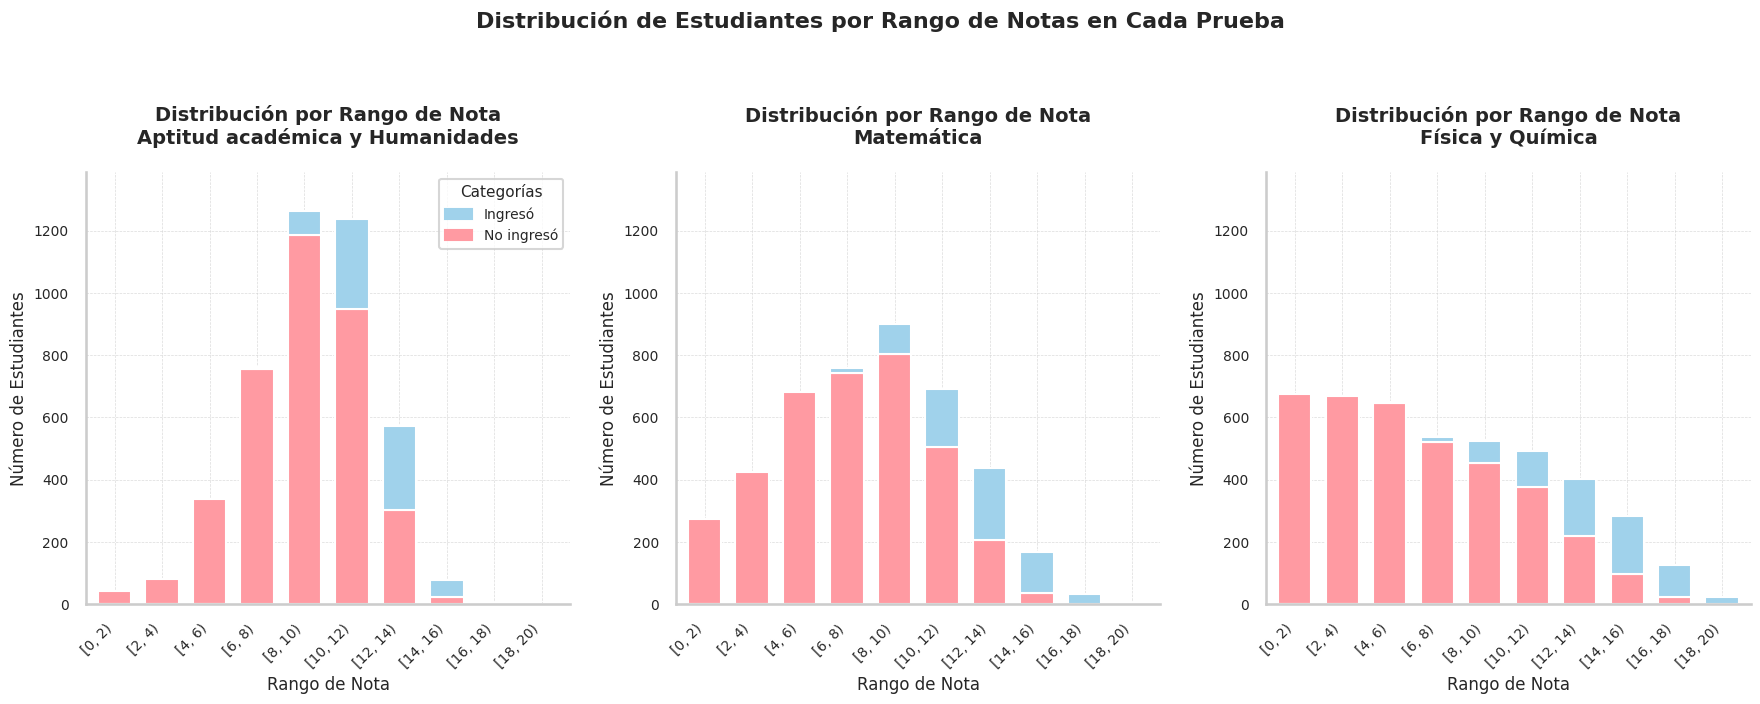

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Estilo general
sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Definir rangos de notas escaladas
bins_vig = range(0, 22, 2) # Rangos de 0 a 2, 2 a 4, ... hasta 18 a 20

# Crear columnas con los rangos de notas escaladas
admision_sin_arqui['Rango Prueba 1_vig'] = pd.cut(admision_sin_arqui['Prueba 1_vig'], bins=bins_vig, right=False)
admision_sin_arqui['Rango Prueba 2_vig'] = pd.cut(admision_sin_arqui['Prueba 2_vig'], bins=bins_vig, right=False)
admision_sin_arqui['Rango Prueba 3_vig'] = pd.cut(admision_sin_arqui['Prueba 3_vig'], bins=bins_vig, right=False)

# Contar ingresados y no ingresados por rango de notas escaladas para cada prueba
conteo_prueba1_vig = admision_sin_arqui.groupby(['Rango Prueba 1_vig', 'Ingreso']).size().unstack(fill_value=0)
conteo_prueba2_vig = admision_sin_arqui.groupby(['Rango Prueba 2_vig', 'Ingreso']).size().unstack(fill_value=0)
conteo_prueba3_vig = admision_sin_arqui.groupby(['Rango Prueba 3_vig', 'Ingreso']).size().unstack(fill_value=0)

# Definir paleta de colores (igual que el primer código)
custom_palette = ['#FF9AA2', '#A0D2EB']  # Rosa pastel para 'No', Azul pastel para 'Si'

# Encontrar el valor máximo del eje y en todas las gráficas
max_y = max(conteo_prueba1_vig.sum(axis=1).max(),
            conteo_prueba2_vig.sum(axis=1).max(),
            conteo_prueba3_vig.sum(axis=1).max())

# Crear las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Títulos de las pruebas (consistente con el primer código)
titulos = [
    'Aptitud académica y Humanidades',
    'Matemática',
    'Física y Química'
]

conteos = [conteo_prueba1_vig, conteo_prueba2_vig, conteo_prueba3_vig]

for i, (conteo, titulo) in enumerate(zip(conteos, titulos)):
    # Crear gráfico de barras con colores personalizados
    conteo.plot(kind='bar', stacked=True, ax=axes[i], color=custom_palette, width=0.7)

    # Título con formato mejorado
    axes[i].set_title(f'Distribución por Rango de Nota\n{titulo}',
                      fontsize=14, weight='bold', pad=20)

    # Etiquetas de ejes
    axes[i].set_xlabel('Rango de Nota', fontsize=12)
    axes[i].set_ylabel('Número de Estudiantes', fontsize=12)

    # Formato de etiquetas del eje x
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].set_xticklabels(conteo.index, rotation=45, ha='right')
    axes[i].tick_params(axis='y', labelsize=10)

    # Configurar límites del eje y
    axes[i].set_ylim(0, max_y * 1.1)

    # Leyenda personalizada (solo en el primer gráfico para evitar repetición)
    if i == 0:
        handles = [
            Patch(color='#A0D2EB', label='Ingresó'),
            Patch(color='#FF9AA2', label='No ingresó')
        ]
        axes[i].legend(handles=handles, title='Categorías', title_fontsize=11,
                       fontsize=10, loc='upper right', frameon=True)
    else:
        axes[i].legend().set_visible(False)

    # Aplicar grid y estilo
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Título general de la figura
fig.suptitle('Distribución de Estudiantes por Rango de Notas en Cada Prueba',
             fontsize=16, weight='bold', y=1.02)

# Estilo final
plt.tight_layout()
sns.despine()

plt.show()

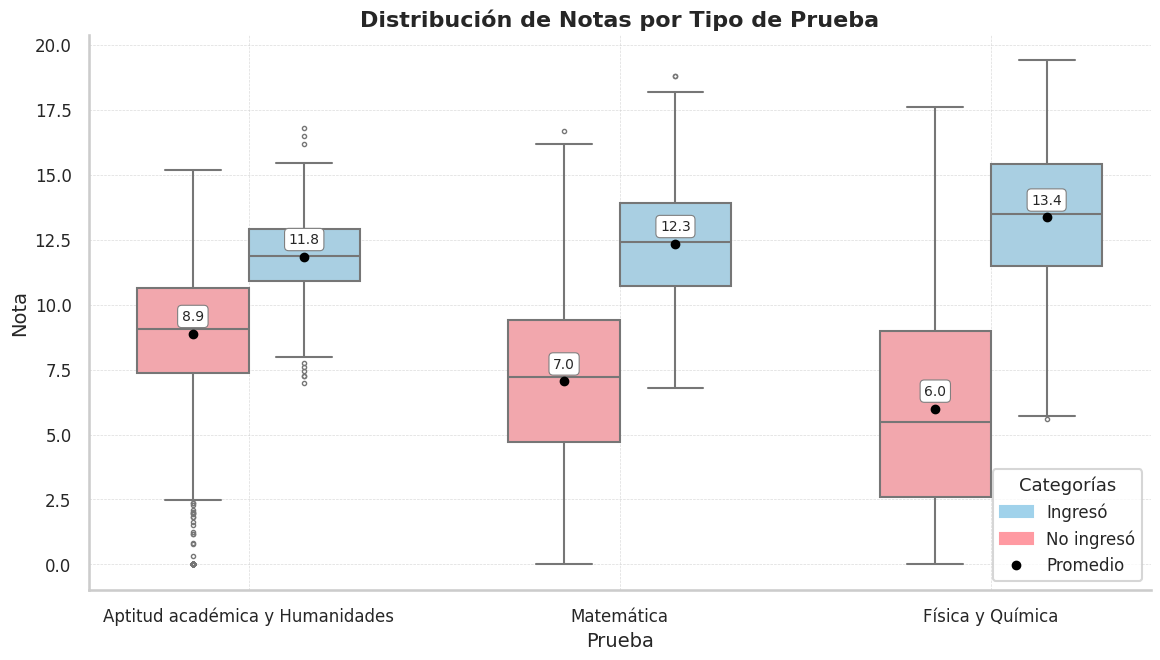

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Estilo general
sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Reorganizar el dataframe a formato largo
df_melted = pd.melt(
    admision_sin_arqui,
    id_vars='Ingreso',
    value_vars=['Prueba 1_vig', 'Prueba 2_vig', 'Prueba 3_vig'],
    var_name='Prueba',
    value_name='Nota_Escalada'
)

# Cambiar etiquetas de las pruebas
df_melted['Prueba'] = df_melted['Prueba'].replace({
    'Prueba 1_vig': 'Aptitud académica y Humanidades',
    'Prueba 2_vig': 'Matemática',
    'Prueba 3_vig': 'Física y Química'
})

# Definir paleta de colores
custom_palette = {
    'No': '#FF9AA2',   # Rosa pastel
    'Si': '#A0D2EB'    # Azul pastel
}

# Crear la figura y el boxplot
plt.figure(figsize=(12, 7))
ax = sns.boxplot(
    x='Prueba',
    y='Nota_Escalada',
    hue='Ingreso',
    data=df_melted,
    palette=custom_palette,
    width=0.6,
    linewidth=1.5,
    fliersize=3
)

# Calcular promedios por grupo
mean_df = df_melted.groupby(['Prueba', 'Ingreso'])['Nota_Escalada'].mean().reset_index()

# Posiciones únicas para el eje X
x_labels = df_melted['Prueba'].unique().tolist()

# Añadir marcadores y etiquetas cerca del punto
for index, row in mean_df.iterrows():
    x = x_labels.index(row['Prueba'])
    offset = -0.15 if row['Ingreso'] == 'No' else 0.15
    x_pos = x + offset
    y = row['Nota_Escalada']

    # Punto negro
    ax.plot(x_pos, y, 'o', color='black', markersize=6, zorder=5)

    # Etiqueta del promedio
    ax.text(
        x_pos, y + 0.4, f'{y:.1f}',
        ha='center', va='bottom', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.8)
    )

# Título con explicación
plt.title('Distribución de Notas por Tipo de Prueba',
          fontsize=16, weight='bold')

# Ejes
plt.ylabel('Nota', fontsize=14)
plt.xlabel('Prueba', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda personalizada
handles = [
    Patch(color='#A0D2EB', label='Ingresó'),
    Patch(color='#FF9AA2', label='No ingresó'),
    Line2D([0], [0], marker='o', color='black', label='Promedio', markersize=6, linestyle='None')
]
plt.legend(handles=handles, title='Categorías', title_fontsize=13, fontsize=12, loc='lower right', frameon=True)

# Estilo final
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.show()


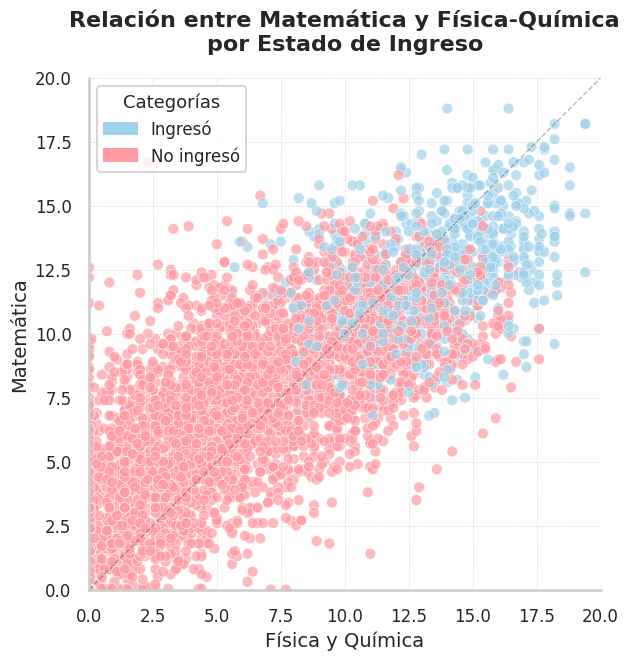

In [ ]:
# Estilo general
sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Definir paleta de colores (consistente con los otros códigos)
custom_palette = {
    'No': '#FF9AA2',   # Rosa pastel
    'Si': '#A0D2EB'    # Azul pastel
}

# Crear el scatter plot
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    x='Prueba 3_vig',
    y='Prueba 2_vig',
    hue='Ingreso',
    data=admision_sin_arqui,
    palette=custom_palette,
    s=60,  # Tamaño de los puntos ligeramente mayor
    alpha=0.7,  # Transparencia de los puntos
    edgecolors='white',  # Borde blanco para mejor definición
    linewidth=0.5
)

# Título con formato mejorado
plt.title('Relación entre Matemática y Física-Química\npor Estado de Ingreso',
          fontsize=16, weight='bold', pad=20)

# Etiquetas de ejes con formato mejorado
plt.xlabel('Física y Química', fontsize=14)
plt.ylabel('Matemática', fontsize=14)

# Establecer los límites de los ejes
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

# Asegurar que la relación de aspecto sea igual
ax.set_aspect('equal', adjustable='box')

# Establecer las ubicaciones de las marcas principales en los ejes
tick_locations = np.arange(0, 21, 2.5)
ax.set_xticks(tick_locations)
ax.set_yticks(tick_locations)

# Formato de etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda personalizada
handles = [
    Patch(color='#A0D2EB', label='Ingresó'),
    Patch(color='#FF9AA2', label='No ingresó')
]
plt.legend(handles=handles, title='Categorías', title_fontsize=13,
           fontsize=12, loc='upper left', frameon=True)

# Añadir línea de referencia diagonal (opcional)
ax.plot([0, 20], [0, 20], 'k--', alpha=0.3, linewidth=1, label='Referencia (x=y)')

# Estilo final
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.show()

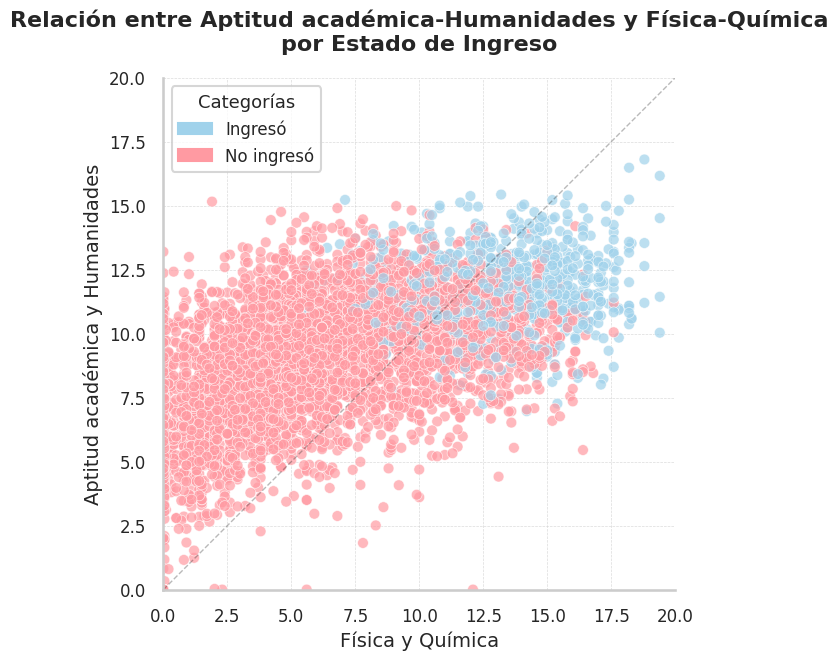

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Estilo general
sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Definir paleta de colores (consistente con los otros códigos)
custom_palette = {
    'No': '#FF9AA2',   # Rosa pastel
    'Si': '#A0D2EB'    # Azul pastel
}

# Crear el scatter plot
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    x='Prueba 3_vig',
    y='Prueba 1_vig',
    hue='Ingreso',
    data=admision_sin_arqui,
    palette=custom_palette,
    s=60,  # Tamaño de los puntos ligeramente mayor
    alpha=0.7,  # Transparencia de los puntos
    edgecolors='white',  # Borde blanco para mejor definición
    linewidth=0.5
)

# Título con formato mejorado
plt.title('Relación entre Aptitud académica-Humanidades y Física-Química\npor Estado de Ingreso',
          fontsize=16, weight='bold', pad=20)

# Etiquetas de ejes con formato mejorado
plt.xlabel('Física y Química', fontsize=14)
plt.ylabel('Aptitud académica y Humanidades', fontsize=14)

# Establecer los límites de los ejes
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

# Asegurar que la relación de aspecto sea igual
ax.set_aspect('equal', adjustable='box')

# Establecer las ubicaciones de las marcas principales en los ejes
tick_locations = np.arange(0, 21, 2.5)
ax.set_xticks(tick_locations)
ax.set_yticks(tick_locations)

# Formato de etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda personalizada
handles = [
    Patch(color='#A0D2EB', label='Ingresó'),
    Patch(color='#FF9AA2', label='No ingresó')
]
plt.legend(handles=handles, title='Categorías', title_fontsize=13,
           fontsize=12, loc='upper left', frameon=True)

# Añadir línea de referencia diagonal (opcional)
ax.plot([0, 20], [0, 20], 'k--', alpha=0.3, linewidth=1, label='Referencia (x=y)')

# Estilo final
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.show()